In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model
from scipy.stats import pearsonr
plt.rcParams.update({'font.size': 16})

In [3]:
folder = r'C:\Users\Marina\Documents\Doctorado2\2019-11-14'

files = glob.glob(folder + '\Image9*.csv') #change number for each analysis

#change time in seconds for each analysis
tot_time = 147 #image 9
#tot_time = 162 #image 12
#tot_time = 164 #image 17
#tot_time = 105 #image 21
#tot_time = 123 #image 25
#tot_time = 124 #image 36
#tot_time = 104 #image 40
#tot_time = 108 #image 47
#tot_time = 129 #image 51
#tot_time = 115 #image 55
#tot_time = 115 #image 59
#tot_time = 138 #image 63 2 DONORS
#tot_time = 165 #image 67 NON RECOVERY

In [6]:
bgr = pd.read_csv(files[0])['Y'].values
bleach = pd.read_csv(files[1])['Y'].values

if len(files) == 3:
    ctr = pd.read_csv(r'C:\Users\Marina\Documents\Doctorado2\2019-11-14\Image9_ctrl.csv')['Y'].values
    donor = pd.read_csv(files[2])['Y'].values
else:
    ctr = pd.read_csv(files[2])['Y'].values
    donor = pd.read_csv(files[3])['Y'].values
    
time_step = tot_time/len(bgr)
t = np.arange(0, tot_time, time_step)

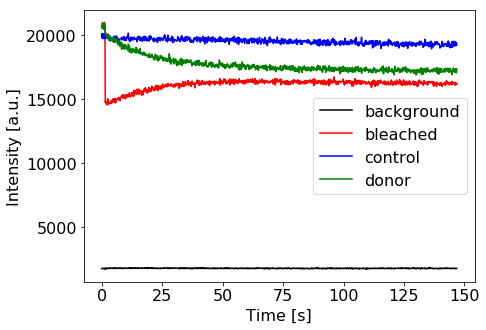

In [7]:
plt.rcParams["figure.figsize"] = [7, 5]
plt.plot(t, bgr, 'k-', label = 'background')
plt.plot(t, bleach, 'r-', label = 'bleached')
plt.plot(t, ctr, 'b-', label = 'control')
plt.plot(t, donor, 'g-', label = 'donor')
plt.xlabel('Time [s]')
plt.ylabel('Intensity [a.u.]')
plt.legend()
plt.savefig(folder + '\\signals.png')
plt.show()

In [429]:
#we take only after bleaching data
bgr = bgr[10:]
ctr = ctr[10:]
bleach = bleach[10:]
donor = donor[10:]
t = t[10:]


#normalize control

norm_ctr = (ctr-bgr)/(ctr[0]-bgr[0])

#substract bgr and natural bleach to signals

bleach_n = (bleach-bgr)*(2-norm_ctr)
donor_n = (donor-bgr)*(2-norm_ctr)

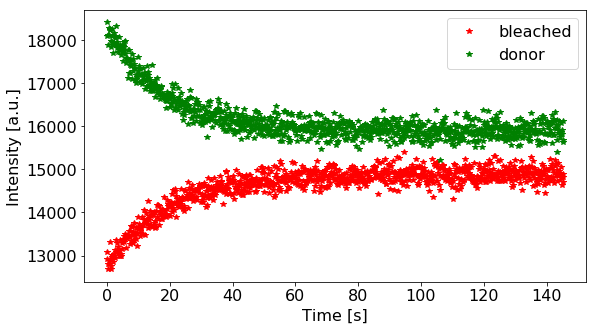

In [443]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.plot(t, bleach_n, 'r*', label = 'bleached')
plt.plot(t, donor_n, 'g*', label = 'donor')
plt.xlabel('Time [s]')
plt.ylabel('Intensity [a.u.]')
plt.legend()
plt.savefig(folder + '\\normalized.png')
plt.show()

[[Model]]
    Model(recovery)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 990
    # variables        = 3
    chi-square         = 25589975.6
    reduced chi-square = 25927.0269
    Akaike info crit   = 10064.4062
    Bayesian info crit = 10079.0994
[[Variables]]
    amp:  2109.43049 +/- 27.8809593 (1.32%) (init = 1000)
    tau:  0.05177220 +/- 0.00120955 (2.34%) (init = 0)
    y0:   12782.0114 +/- 28.7958643 (0.23%) (init = 10000)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, y0)  = -0.966
    C(tau, y0)  = -0.697
    C(amp, tau) =  0.561

[[Model]]
    Model(donori)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 990
    # variables        = 3
    chi-square         = 29819852.6
    reduced chi-square = 30212.6166
    Akaike info crit   = 10215.8502
    Bayesian info crit = 10230.5433
[[Variables]]
    amp:  2396.36116 +/- 31.7288289 (1.32%) (init =

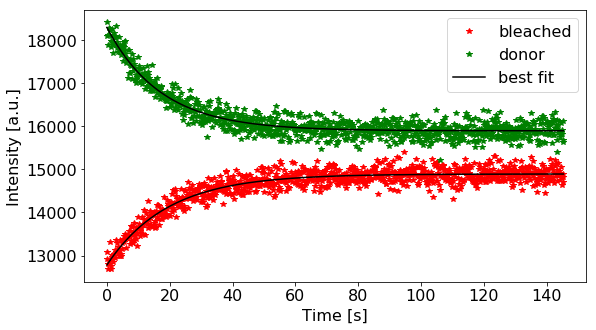

In [444]:
def recovery(x, amp, tau, y0):
    return amp*(1-np.exp(-x*tau))+y0

def donori(x, amp, y0, tau):
    return amp*np.exp(-(x)*tau)+y0

t = t-t[0]
mod = Model(recovery)
pars = mod.make_params(amp=1000, tau = 0, y0 = 10000)

result = mod.fit(bleach_n, pars, x=t)

print(result.fit_report())

mod2 = Model(donori)
pars2 = mod2.make_params(amp = 2000, y0 = 16000, tau = 0.07)

result2 = mod2.fit(donor_n, pars2, x=t)

print(result2.fit_report())


plt.plot(t, bleach_n, 'r*', label = 'bleached')
plt.plot(t, donor_n, 'g*', label = 'donor')
plt.plot(t, result.best_fit, 'k-', label='best fit')
plt.plot(t, result2.best_fit, 'k-')
#plt.plot(t, (bleach_n+donor_n)/2, 'b*')
plt.ylabel('Intensity [a.u.]')
plt.xlabel('Time [s]')
plt.legend()
plt.savefig(folder + '\\fit.png')
plt.show()

In [480]:
tau, e_tau = 0.0135, 0.002   ##change 
tau_m = np.log(0.5)/-tau
etau_m = np.log(0.5)*e_tau/-tau**2
D = 0.224*12**2/tau_m
e_D = 0.224*12**2*etau_m/tau_m**2
D, e_D

(0.6282302117253444, 0.09307114247782883)

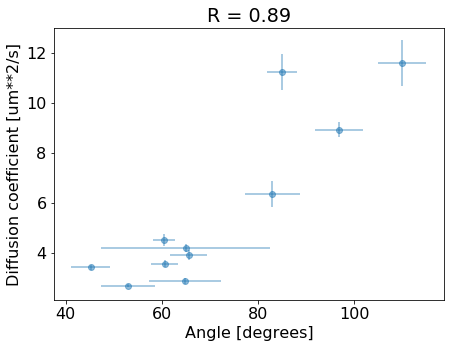

(0.89666868519424, 0.00018447317903637437)

In [10]:
#D_list = [2.4008687756266207, 2.823327533092021, 5.745133176684121, 6.168204807622737, 2.5438562985938713, 5.595263508086347, 6.946623921964553, 3.6942849576209813, 2.02628674456324, 6.0861388623872, 2.0121199206109774]
#eD_list = [0.05629408052771476, 0.11964900327950999, 0.25937345199148765, 0.20259540152288819, 0.0878465938948359, 0.4261234337004649, 0.5261800307769672, 0.20203744002373364, 0.07671435454306277, 0.27412429736279875, 0.05222966373570796]

D_list = [2.4092489012953244, 2.823327533092021, 5.745304427586279, 6.167953515538047, 2.5439065570108093, 5.595352391027413, 6.946293984764471, 3.6942854229766935, 2.0263900535313906, 6.08675825084039, 2.0121199206109774]
eD_list = [0.05628710019202892, 0.11965086470235953, 0.25932691642024874, 0.2025567769987599, 0.08786055456620757, 0.42594427175119504, 0.5261283762928922, 0.20205651960794155, 0.0767311073487088, 0.2741941007196571, 0.05222966373570796]

donorD = [2.681735611906226, 2.88615334639883, 3.5765113378623994, 8.925332233137414, 4.195769026097168, 6.354232615073147, 11.582135947396681, 3.907854842909143, 4.525882130640356, 11.23874810580188, 3.424212512445955]
e_donorD = [0.060734970091044366, 0.11448076273771617, 0.13507135694379863, 0.3004778567111084, 0.16430732957464658, 0.5341683269358392, 0.920689989511988, 0.2002123149197434, 0.24776608445736528, 0.7373551955691741, 0.10168906491556337]


angle = [52.957,64.749,60.57,96.931,64.982, 83.0, 110, 65.6, 60.5, 85.0, 45.2]
e_angle = [5.66,7.49,2.90,4.99,17.54, 5.8, 5, 3.9, 2.3, 3.1, 4.0]

#angle2 = [46.3, 53.6, 55.9, 82.9, 55, 83.0, 110, 65.6, 60.5, 85.0, 45.2]
#e_angle2 = [3.0, 6.3, 5.2, 2.5, 15, 5.8, 5, 3.9, 2.3, 3.1, 4.0]

fit = np.polyfit(donorD, angle, 1, w = [1/e for e in e_angle])
f = np.poly1d(fit)

#plt.errorbar(D_list, angle, yerr = e_angle, xerr = eD_list, marker = 'o', linestyle = '', alpha = 0.5, label = 'bleached')
plt.errorbar(angle, donorD, xerr = e_angle, yerr = e_donorD, marker = 'o', linestyle = '', alpha = 0.5, label = 'donor')
#plt.errorbar(angle2, D_list, xerr = e_angle, yerr = eD_list, marker = 'o', linestyle = '', alpha = 0.5)
#plt.plot(donorD, f(donorD), 'k--')
plt.ylabel('Diffusion coefficient [um**2/s]')
plt.xlabel('Angle [degrees]')
#plt.legend()
plt.savefig(folder + '\\angledif.png')
plt.title('R = 0.89')
plt.show()

pearsonr(donorD, angle)

In [452]:
fit

array([ 4.77775773, 41.14869234])

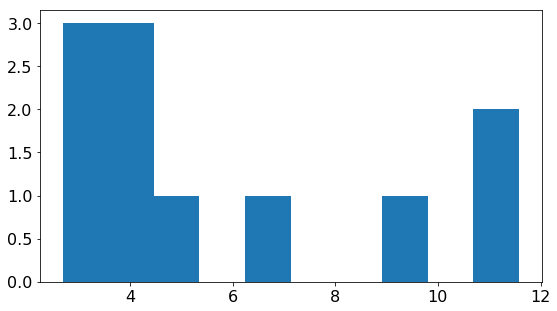

In [412]:
plt.hist(donorD)
plt.show()

## Only for 2 donors

In [467]:

bgr = pd.read_csv(files[0])['Y'].values
bleach = pd.read_csv(files[1])['Y'].values
donor1 = pd.read_csv(files[2])['Y'].values
donor2 = pd.read_csv(files[3])['Y'].values
ctr = pd.read_csv(r'C:\Users\Marina\Documents\Doctorado2\2019-11-14\Image9_ctrl.csv')['Y'].values
time_step = tot_time/len(bgr)
t = np.arange(0, tot_time, time_step)

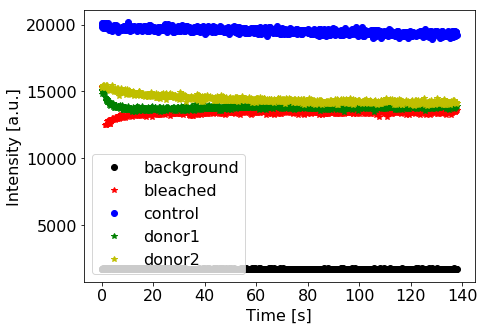

In [468]:
plt.rcParams["figure.figsize"] = [7, 5]
plt.plot(t, bgr, 'ko', label = 'background')
plt.plot(t, bleach, 'r*', label = 'bleached')
plt.plot(t, ctr, 'bo', label = 'control')
plt.plot(t, donor1, 'g*', label = 'donor1')
plt.plot(t, donor2, 'y*', label = 'donor2')
plt.xlabel('Time [s]')
plt.ylabel('Intensity [a.u.]')
plt.legend()
plt.show()

In [469]:
#we take only after bleaching data
bgr = bgr[10:]
ctr = ctr[10:]
bleach = bleach[10:]
donor1 = donor1[10:]
donor2 = donor2[10:]
t = t[10:]

#normalize control

norm_ctr = (ctr-bgr)/(ctr[0]-bgr[0])

#substract bgr and natural bleach to signals

bleach_n = (bleach-bgr)*(2-norm_ctr)
donor1_n = (donor1-bgr)*(2-norm_ctr)
donor2_n = (donor2-bgr)*(2-norm_ctr)

[[Model]]
    Model(recovery)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 61
    # data points      = 890
    # variables        = 3
    chi-square         = 17367491.0
    reduced chi-square = 19580.0349
    Akaike info crit   = 8798.21140
    Bayesian info crit = 8812.58507
[[Variables]]
    amp1:  648.956528 +/- 38.9357571 (6.00%) (init = 1000)
    tau1:  0.01236573 +/- 0.00257353 (20.81%) (init = 0)
    y01:   11547.1907 +/- 30.6700084 (0.27%) (init = 10000)
[[Correlations]] (unreported correlations are < 0.100)
    C(tau1, y01)  = -0.873
    C(amp1, tau1) = -0.764
    C(amp1, y01)  =  0.368

[[Model]]
    Model(donori)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 990
    # variables        = 3
    chi-square         = 21819959.0
    reduced chi-square = 22107.3546
    Akaike info crit   = 9906.62441
    Bayesian info crit = 9921.31752
[[Variables]]
    amp2:  745.834526 +/- 25.4559925 (3.4

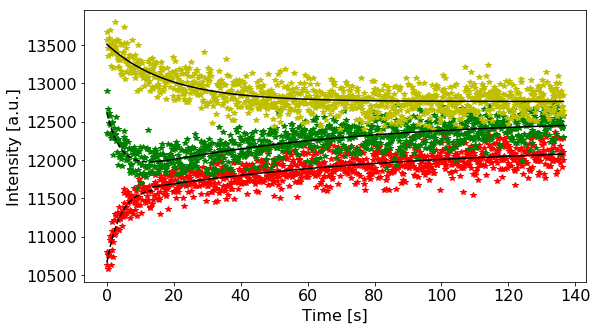

In [471]:
def recovery(x, amp1, tau1, y01):
    return amp1*(1-np.exp(-x*tau1))+y01

def donori(x, amp2, y02, tau2):
    return amp2*np.exp(-(x)*tau2)+y02


t = t-t[0]
mod = Model(recovery)
pars = mod.make_params(amp1=1000, tau1 = 0, y01 = 10000)





mod2 = Model(donori)
mod3 = mod + mod2

pars2 = mod2.make_params(amp2 = 2000, y02 = 16000, tau2 = 0.07)
pars4 = mod2.make_params(amp2 = 2000, y02 = 16000, tau2 = 0.2)

result = mod.fit(bleach_n[100:], pars, x=t[100:])
#result = mod.fit(bleach_n, pars, x=t)
result4 = mod.fit(bleach_n[:100], pars, x=t[:100])
result2 = mod2.fit(donor2_n, pars2, x=t)

print(result.fit_report())
print(result2.fit_report())


result3 = mod3.fit(donor1_n, pars+pars2, x=t)
#result3 = mod2.fit(donor1_n, pars2, x=t)

print(result3.fit_report())
print(result4.fit_report())

plt.rcParams["figure.figsize"] = [9, 5]
plt.plot(t, bleach_n, 'r*', label = 'bleached')
plt.plot(t, donor1_n, 'g*', label = 'donor1')
plt.plot(t, donor2_n, 'y*', label = 'donor2')
plt.plot(t[100:], result.best_fit, 'k-', label='best fit 1')
#plt.plot(t, result.best_fit, 'k-', label='best fit 1')
plt.plot(t[:100], result4.best_fit, 'k--')
plt.plot(t, result2.best_fit, 'k-')
plt.plot(t[:100], result3.best_fit[:100], 'k--')
plt.plot(t[100:], result3.best_fit[100:], 'k-')
#plt.plot(t, (bleach_n+donor_n)/2, 'b*')
plt.ylabel('Intensity [a.u.]')
plt.xlabel('Time [s]')
#plt.legend()
plt.savefig(folder + '\\doubledonor.png')
plt.show()

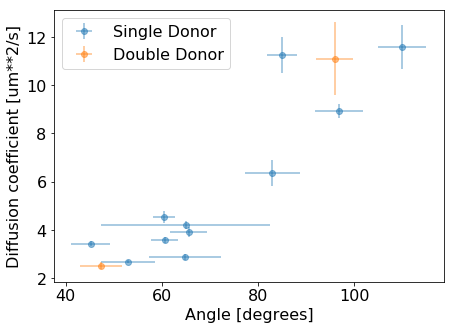

In [9]:
angles2 = [95.9, 47.4]
e_angles2 = [3.8, 4.3]

D2 = [11.1, 2.51]
e_D2 = [1.5, 0.15]

plt.errorbar(angle, donorD, xerr = e_angle, yerr = e_donorD, marker = 'o', linestyle = '', alpha = 0.5, label = 'Single Donor')
plt.errorbar(angles2, D2, xerr = e_angles2, yerr = e_D2, marker = 'o', linestyle = '', alpha = 0.5, label = 'Double Donor')
#plt.plot(donorD, f(donorD), 'k--')
plt.ylabel('Diffusion coefficient [um**2/s]')
plt.xlabel('Angle [degrees]')
plt.legend()
plt.savefig(folder + '\\angledif2.png')
plt.show()